Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1qhDhLkiZ6Of9U2KQaWBsCTCcT9nkC8TC

**Carregando dados**

In [ ]:
import os
import zipfile

dataset_path = r"C:\Users\ecili\Downloads\tumores-cerebrales-mri-dataset.zip"
data_dir = r"C:\Users\ecili\Downloads\tumores-cerebrales-mri-dataset"

# Extrair o arquivo ZIP
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(data_dir)

# Listar as pastas extraídas
class_names = sorted(os.listdir(data_dir))
print("Pastas encontradas:", class_names)


**Criação dos dados de treinamento**

---

O código carrega imagens do diretório, divide em 80% treino e 20% validação.

As imagens são redimensionadas para 180x180.

O uso de seed=123 garante que a divisão sempre aconteça da mesma forma.

Os dados são organizados em lotes de 32 imagens para otimizar o processamento.

Found 44000 files belonging to 4 classes.
Using 35200 files for training.
Found 44000 files belonging to 4 classes.
Using 8800 files for validation.
['Glioma', 'Meningioma', 'Sem Tumor', 'Hipófise']


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 97200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,441,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,452,394 (47.50 MB)

 Trainable params: 12,452,394 (47.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 201s 181ms/step - accuracy: 0.5340 - loss: 1.3540 - val_accuracy: 0.6509 - val_loss: 0.9562
Epoch 2/2
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 149s 135ms/step - accuracy: 0.6758 - loss: 0.8083 - val_accuracy: 0.6885 - val_loss: 0.7617
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


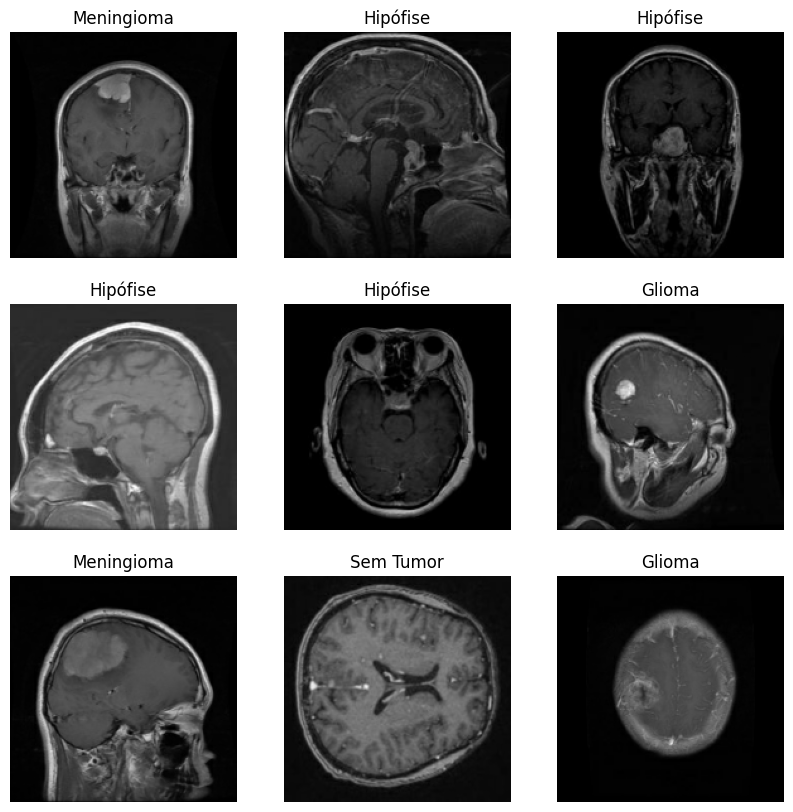

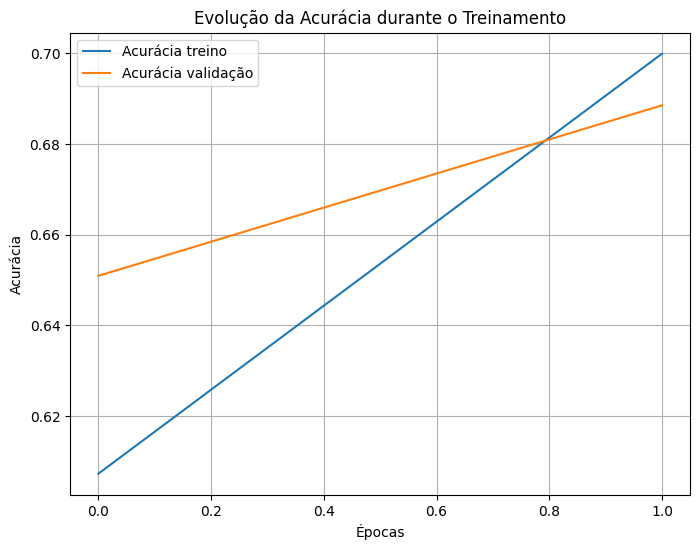

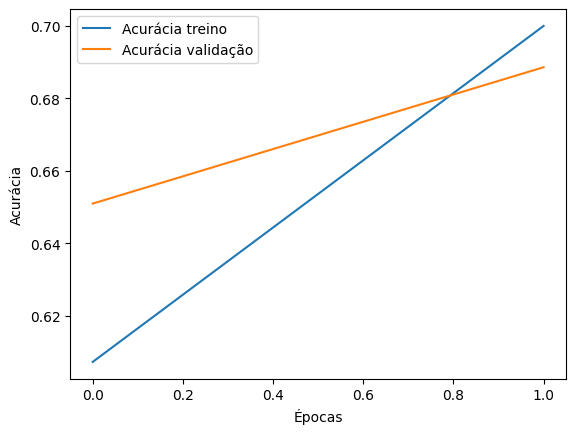

In [ ]:
import tensorflow as tf

data_dir = r"C:\Users\ecili\Downloads\tumores-cerebrales-mri-dataset"  # Caminho correto no seu computador local
  #Pasta com as imagens

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  #20% para validação
    subset="training",
    seed=123,
    image_size=(180, 180),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(180, 180),
    batch_size=32
)

"""**Normalizando as imagens**"""

normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

"""**Tradução das pastas**"""

import os

data_dir = r"C:\Users\ecili\Downloads\tumores-cerebrales-mri-dataset"  # Caminho correto no seu computador local

class_names = sorted(os.listdir(data_dir))

#Dicionário para traduzir os nomes
traducao_classes = {
    "glioma": "Glioma",
    "meningioma": "Meningioma",
    "no-tumor": "Sem Tumor",
    "pituitary": "Hipófise"
}

#Traduzindo os nomes
class_names = [traducao_classes[nome] for nome in class_names if nome in traducao_classes]

print(class_names)

"""**Visualizando as imagens que estão sendo processadas e suas respectivas classificações**"""

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i]])
        plt.axis("off")

#@title Construindo o modelo
model = tf.keras.Sequential()

# Camada de entrada
#model.add(tf.keras.layers.Input(shape=(28,28)))
model.add(tf.keras.layers.Input(shape=(180,180,3)))
model.add(tf.keras.layers.Flatten())

# Camadas intermediarias
#model.add(tf.keras.layers.Dense(1024, activation='relu'))
#model.add(tf.keras.layers.Dense(512, activation='relu'))
#model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
#Camada de saída
'''softmax-> sigmoide ponderada, o somatório das saídas, é 1, já que são probabilidades conjuntas, Ex: 0,1 + 0,5 + 0,4 . '''
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

#@title Configuração do modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#@title Treinamento
results = model.fit(train_ds, validation_data=val_ds, epochs=10)

print(results.history.keys())

import matplotlib.pyplot as plt

# Criar a sequência de épocas
epochs_range = range(len(results.history['accuracy']))

plt.figure(figsize=(8, 6))

# Plotando as curvas de acurácia
plt.plot(epochs_range, results.history['accuracy'], label='Acurácia treino')
plt.plot(epochs_range, results.history['val_accuracy'], label='Acurácia validação')

plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Evolução da Acurácia durante o Treinamento')
plt.legend()
plt.grid(True)  # Adiciona grades para melhor visualização
plt.show()

# Exibir o histórico de perda e acurácia
plt.plot(results.history['accuracy'], label='Acurácia treino')
plt.plot(results.history['val_accuracy'], label='Acurácia validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [23.27523..254.98628].


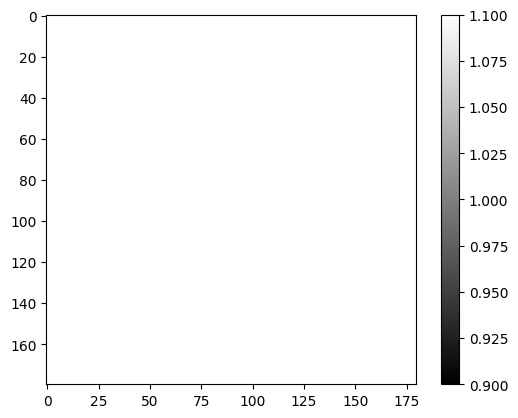

Label predito: 2
Probabilidade: 100.00%
Label real: 1
Item é um(a): Meningioma
Predição: Sem Tumor
Found 44000 files belonging to 4 classes.
Using 8800 files for validation.
275/275 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


<Figure size 800x800 with 0 Axes>

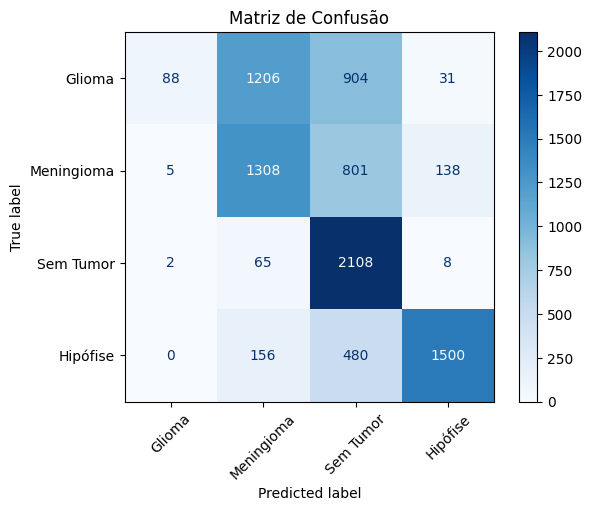

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pegando um único lote do dataset de validação
for images, labels in val_ds.take(1):
    images = images.numpy()  # Convertendo o lote para numpy array
    labels = labels.numpy()  # Convertendo os rótulos para numpy array

# Escolhendo uma posição aleatória **dentro do lote**
n = np.random.randint(0, images.shape[0])

# Pegando a imagem e o rótulo correspondente
test_image = images[n]
test_label = labels[n]

# Fazendo a predição
prob_pred_image = model.predict(np.expand_dims(test_image, axis=0))  # Expandindo dimensão
pred_label = np.argmax(prob_pred_image)  # Pegando a classe com maior probabilidade
prob_image = prob_pred_image[0][pred_label]  # Probabilidade da classe predita

# Pegando os nomes das classes real e predita
diagnostico_real = class_names[test_label]
diagnostico_predita = class_names[pred_label]

# Exibindo a imagem
plt.figure()
plt.imshow(test_image, cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

# Exibindo os resultados
print("Label predito: {}".format(pred_label))
print("Probabilidade: {:.2f}%".format(prob_image * 100))
print("Label real: {}".format(test_label))
print("Item é um(a): {}".format(diagnostico_real))
print("Predição: {}".format(diagnostico_predita))

import tensorflow as tf

data_dir = r"C:\Users\ecili\Downloads\tumores-cerebrales-mri-dataset"  # Caminho correto no seu computador local
 # Certifique-se de que este caminho está correto

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(180, 180),
    batch_size=32
)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Coletando todas as imagens e rótulos do conjunto de validação
all_images = []
all_labels = []

for images, labels in val_ds:
    all_images.extend(images.numpy())  # Convertendo para numpy e adicionando à lista
    all_labels.extend(labels.numpy())

all_images = np.array(all_images)  # Convertendo listas para arrays
all_labels = np.array(all_labels)

# Fazendo a predição em todas as imagens de validação
predictions = model.predict(all_images)
pred_labels = np.argmax(predictions, axis=1)

# Criando a matriz de confusão
cm = confusion_matrix(all_labels, pred_labels)

# Exibindo o gráfico da matriz de confusão
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title('Matriz de Confusão')
plt.show()
